<a href="https://colab.research.google.com/github/andrew623849/AI-/blob/master/CNN%E8%BE%A8%E8%AD%98%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist

(X_train_image,y_train_label),(X_test_image,y_test_label)=mnist.load_data()

#資料處理(圖片轉一維陣列28*28=784) label轉ONEHOT

X_Train=X_train_image.reshape(X_train_image.shape[0],28,28,1).astype('float32')
X_Test=X_test_image.reshape(X_test_image.shape[0],28,28,1).astype('float32')
X_Train_normalize=X_Train/255
X_Test_normalize=X_Test/255

y_Train=np_utils.to_categorical(y_train_label)
y_Test=np_utils.to_categorical(y_test_label)

D:\anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
print(X_train_image[0].shape)

(28, 28)


In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=X_Train_normalize,y=y_Train,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10


KeyboardInterrupt: 

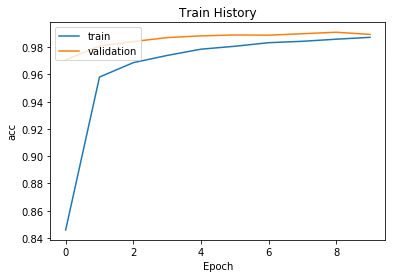

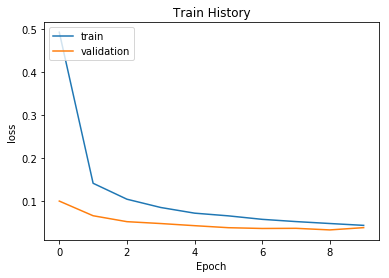

In [0]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [0]:
scores=model.evaluate(X_Test_normalize,y_Test)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 6s 591us/step

accuracy= 0.9907


In [0]:
prediction=model.predict_classes(X_Test_normalize)

In [0]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

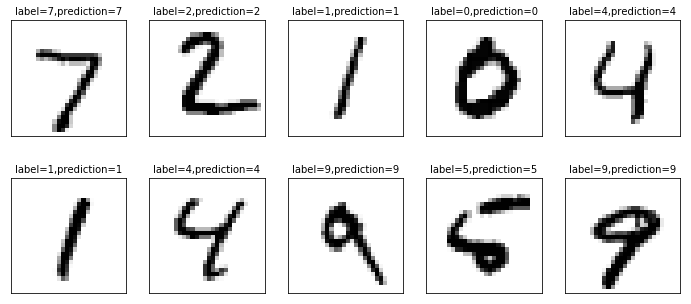

In [0]:
import matplotlib.pyplot as plt
def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:num=25
    for i in range(0,num):
            ax=plt.subplot(5,5,1+i)
            ax.imshow(images[idx],cmap='binary')
            title="label="+str(labels[idx])
            if len(prediction)>0:
                title+=",prediction="+str(prediction[idx])
            
            ax.set_title(title,fontsize=10)
            ax.set_xticks([]);ax.set_yticks([])
            idx+=1
    plt.show()
    
plot_image_labels_prediction(X_test_image,y_test_label,prediction,0)

In [0]:
import pandas as pd

pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1133,1,0,0,0,0,1,0,0
2,1,1,1026,0,0,0,0,4,0,0
3,0,0,1,1005,0,1,0,3,0,0
4,0,0,0,0,976,0,1,0,1,4
5,1,0,0,5,0,883,2,0,0,1
6,3,2,1,0,1,3,948,0,0,0
7,0,3,6,0,0,0,0,1018,1,0
8,3,1,4,2,1,2,0,2,956,3


In [0]:
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
df[(df.label==8)&(df.predict==0)]

,label,predict
495,8,0
2896,8,0
4807,8,0


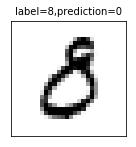

In [0]:
plot_image_labels_prediction(X_test_image,y_test_label,prediction,4807,1)

In [0]:
PP=model.predict(X_test_image)
def show_PP(y,prediction,x_img,PP,i):
    print('label:',y[i],'predict:',prediction[i])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test_image[i],(28,28)))
    plt.show()
    for j in range(10):
        print(y[j]+'Probability:%1.9f'%(PP[i][j]))